
 üìò Dataset cargado con √©xito.


üîç Primeras filas del DataFrame:
   name    datetime  maxC  minC  rocioC  hum_rel  velo_vien_kph  \
0  Lima  2010-09-07  17.7  13.9    12.5     84.1           22.3   
1  Lima  2010-09-08  17.0  13.9    12.3     83.3           18.4   
2  Lima  2010-09-09  19.0  14.7    12.1     77.1           20.5   
3  Lima  2010-09-10  18.1  14.0    12.5     80.3           25.9   
4  Lima  2010-09-11  17.1  14.0    12.2     81.2           14.8   

   vien_grad_sex  nubosidad_por  radiac_solar_watios_m2  energ_solar_MJ_m2  \
0          173.7           97.0                   299.2               25.8   
1          173.1           97.0                   281.9               24.5   
2          173.3           57.7                   296.1               25.6   
3          167.9           72.6                   299.3               25.8   
4          200.2           86.2                   296.5               25.5   

              clase_hoy          clase_manana  
0       

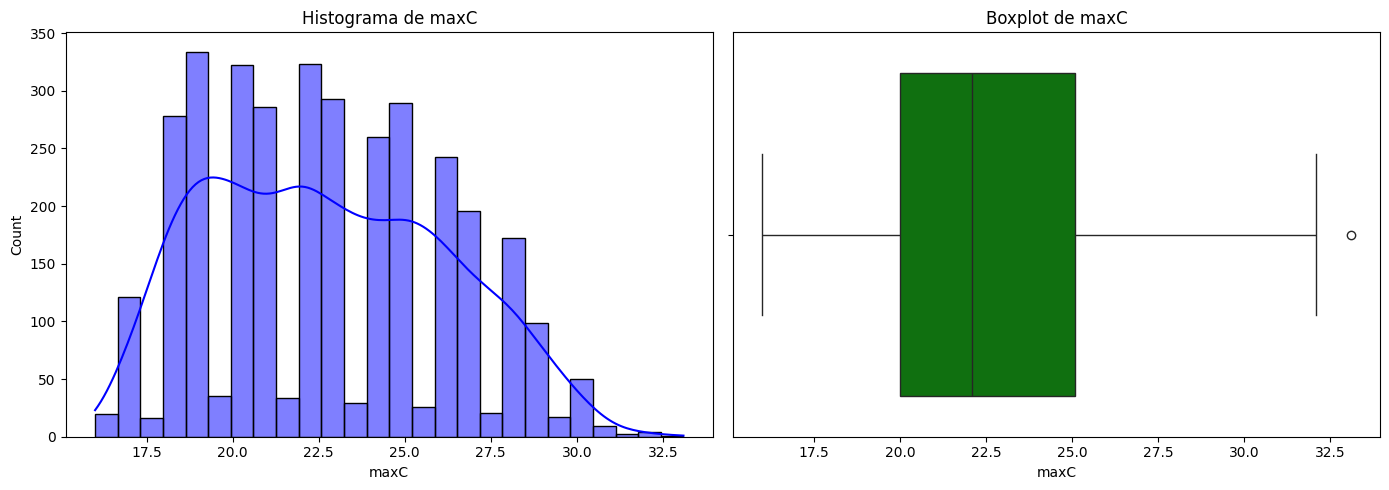

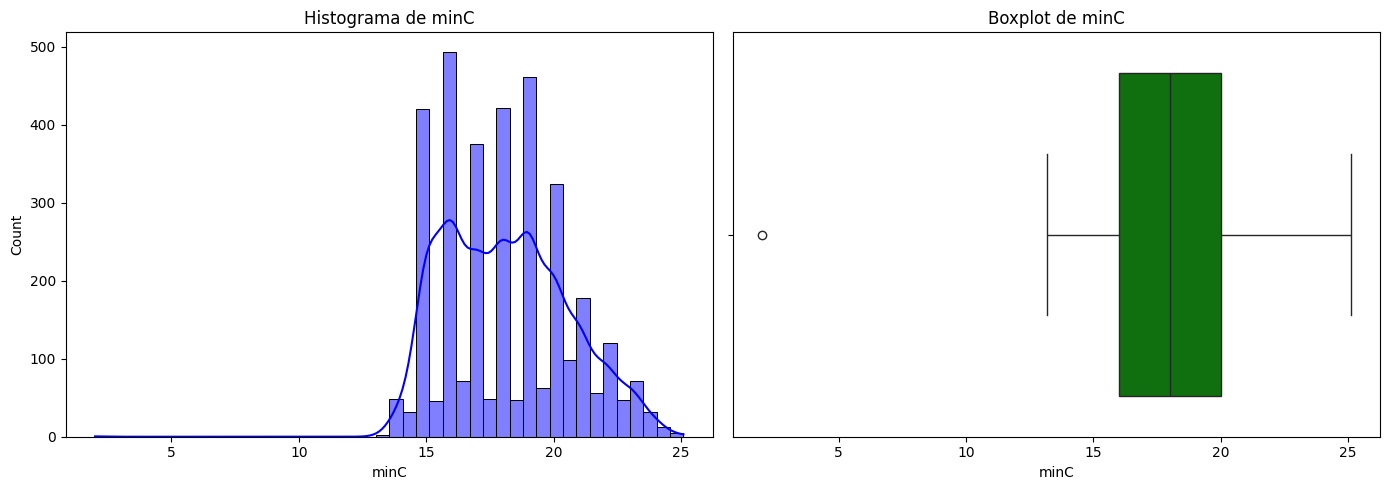

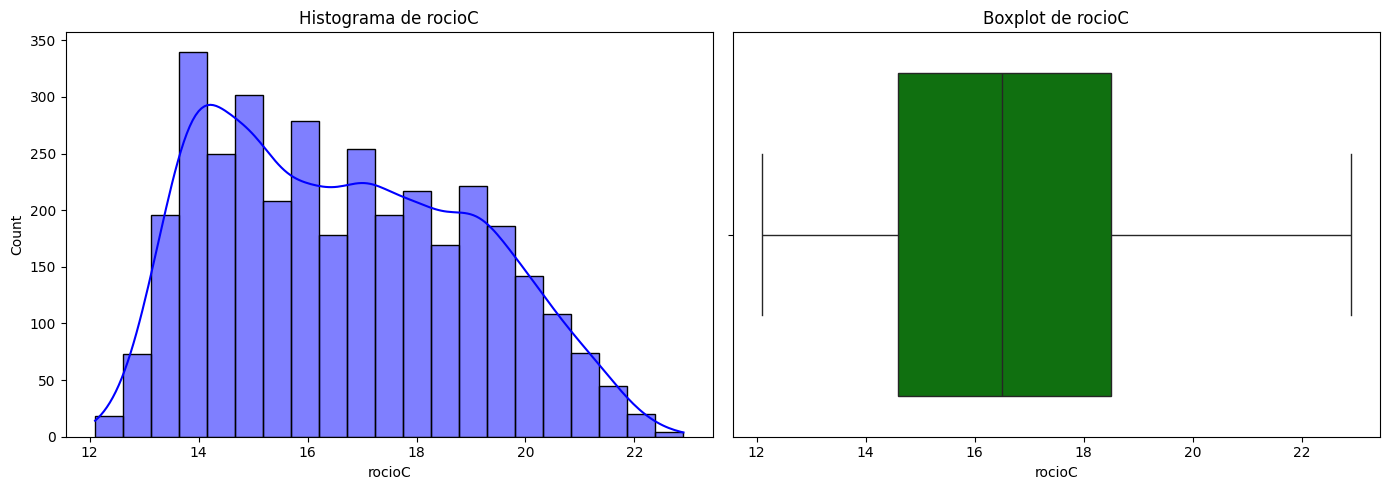

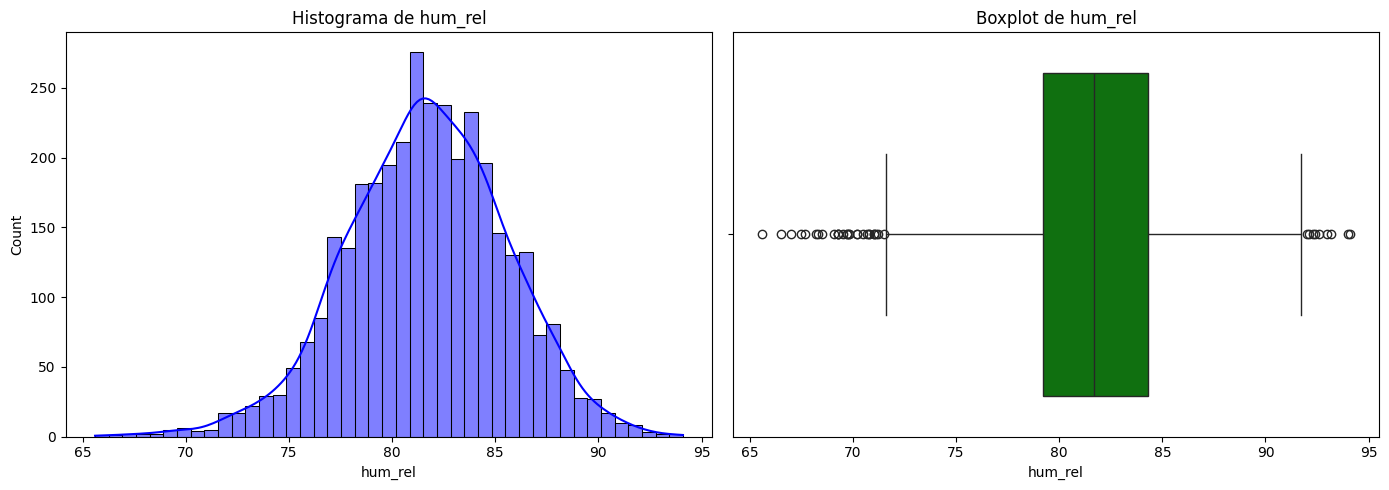

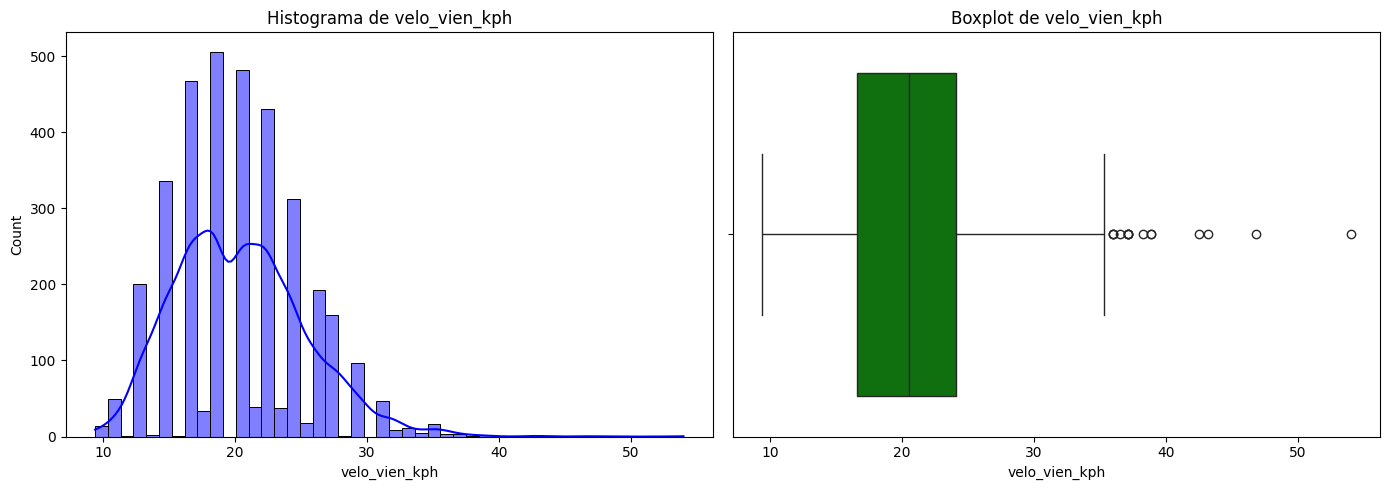

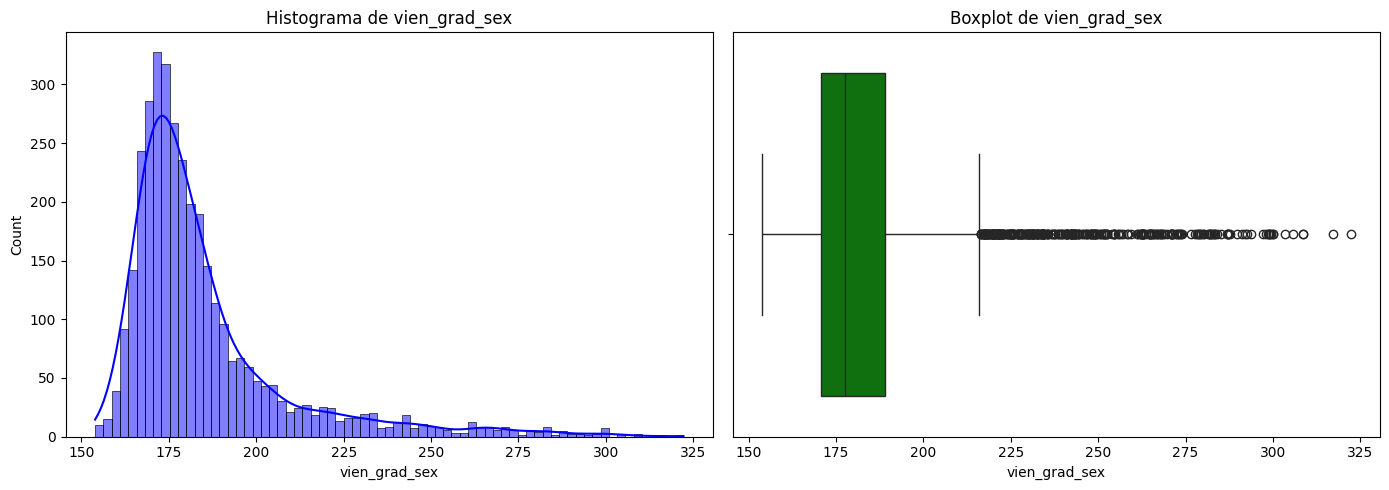

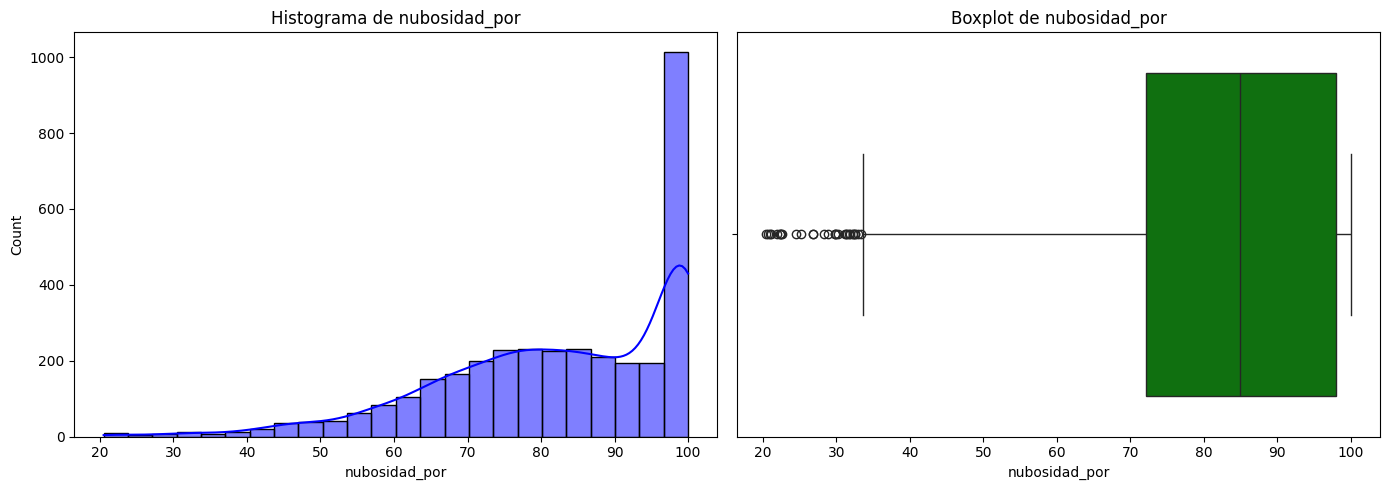

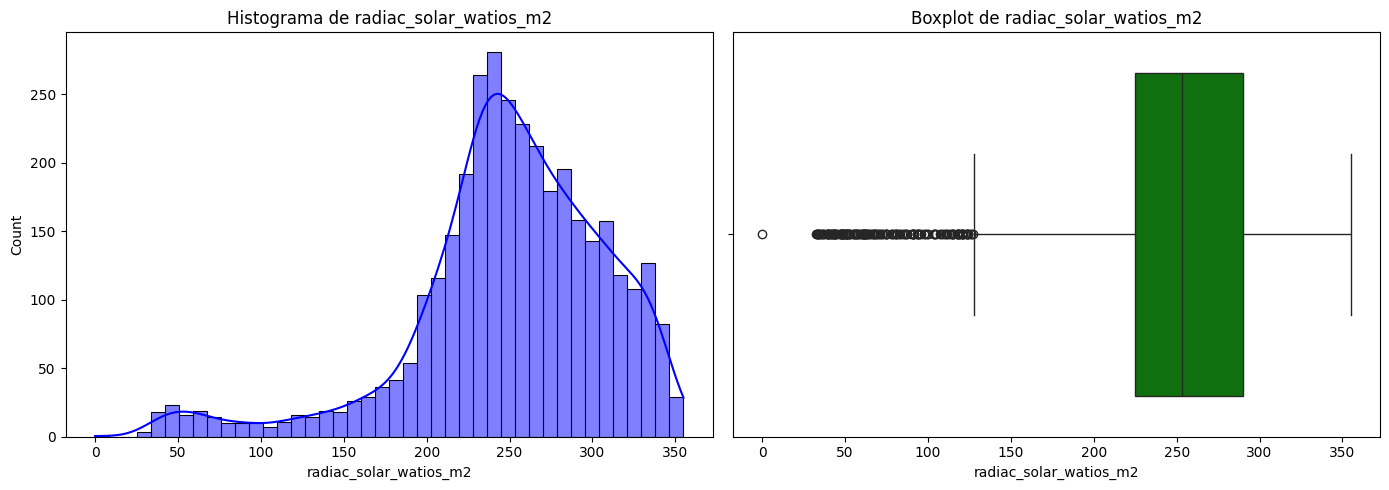

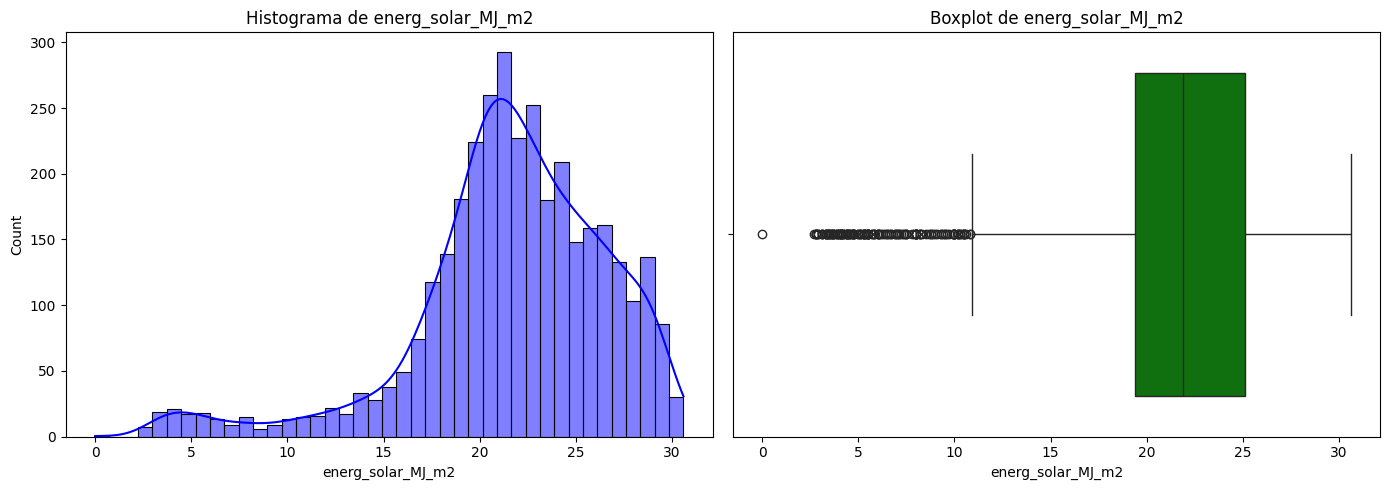

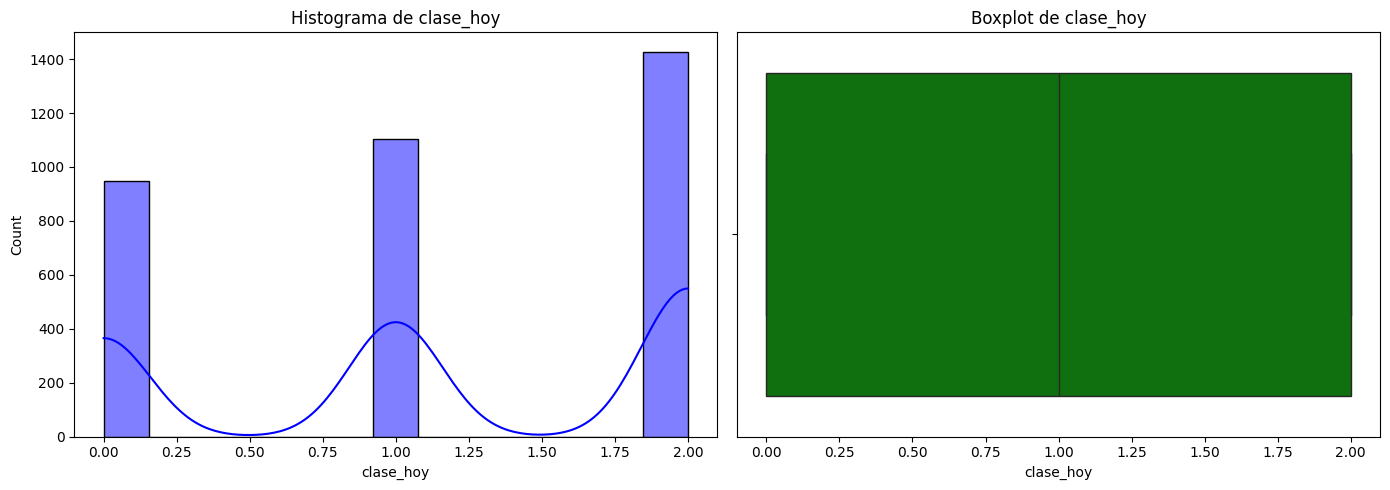

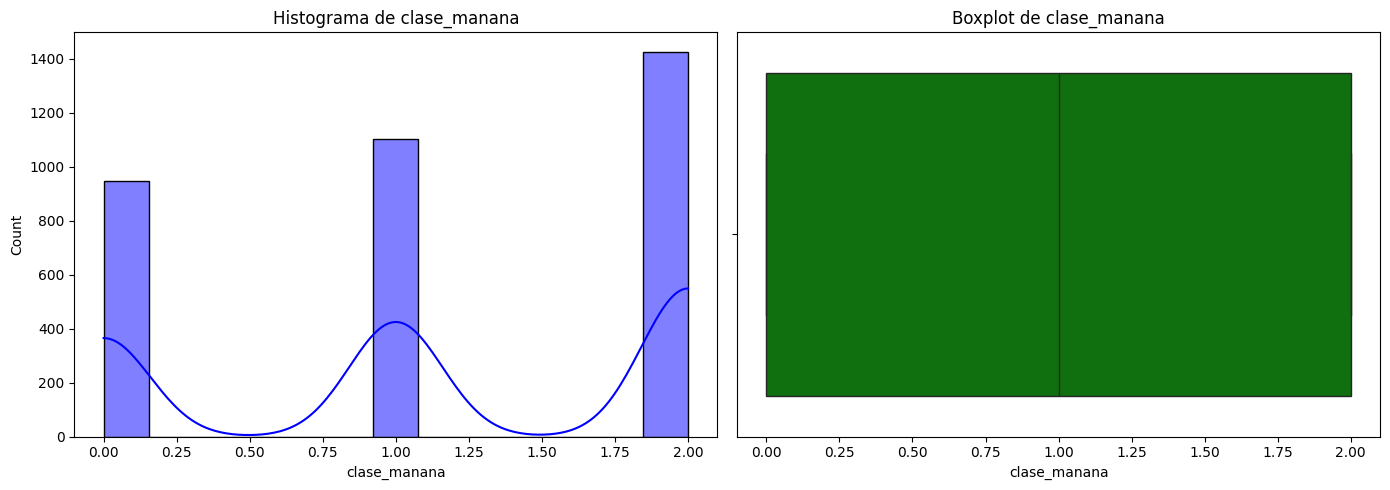

üîé Outliers eliminados:
 - Forma inicial: (3480, 11)
 - Forma final: (2925, 11)

üîç Visualizando la distribuci√≥n de datos luego de remover outliers...



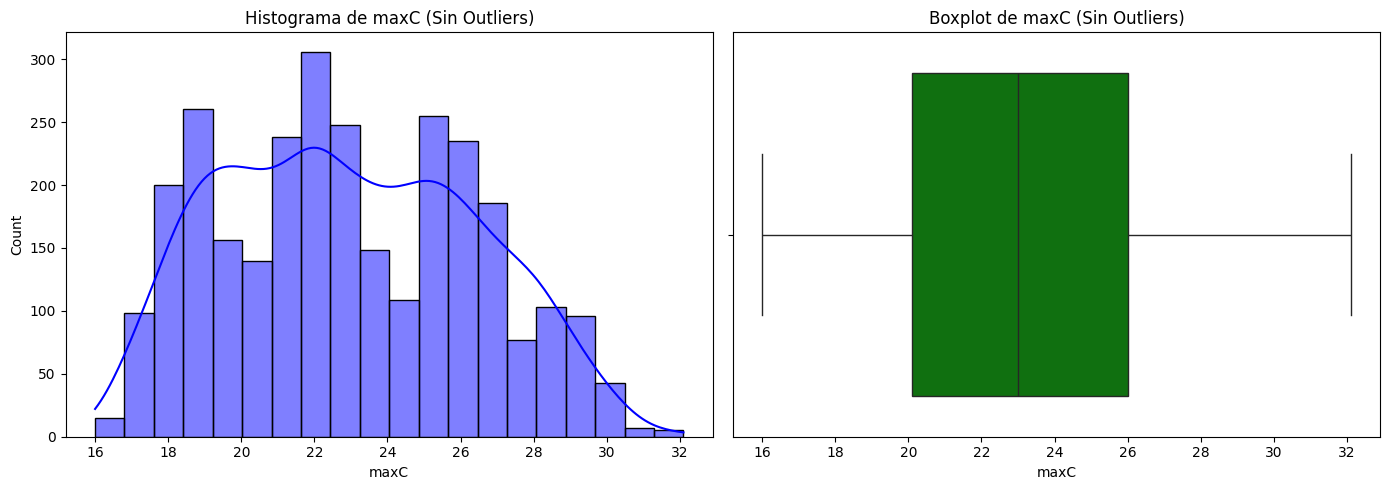

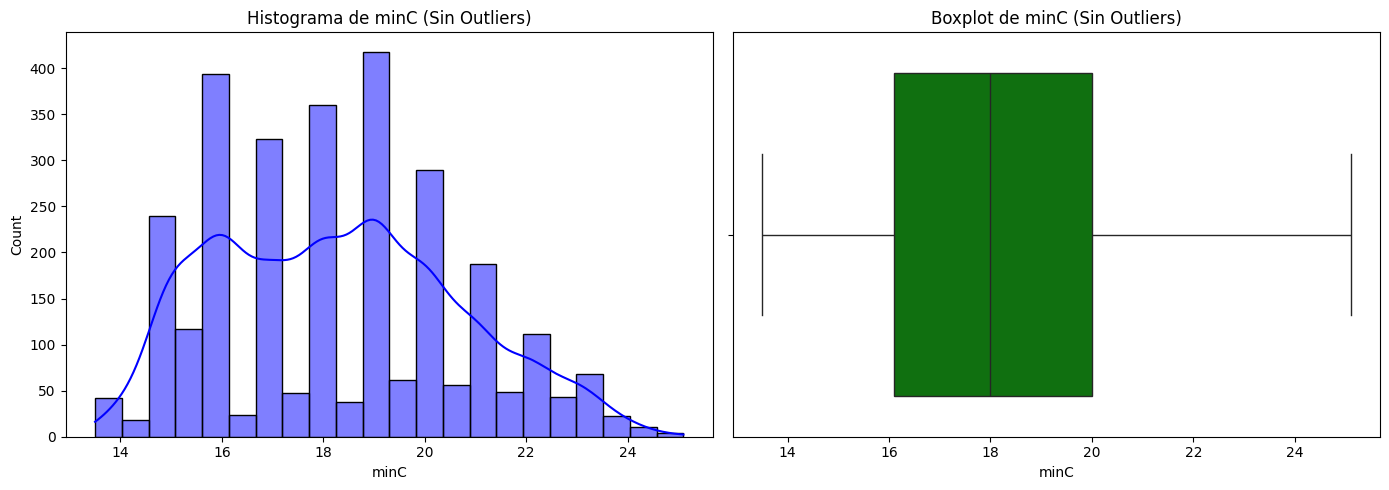

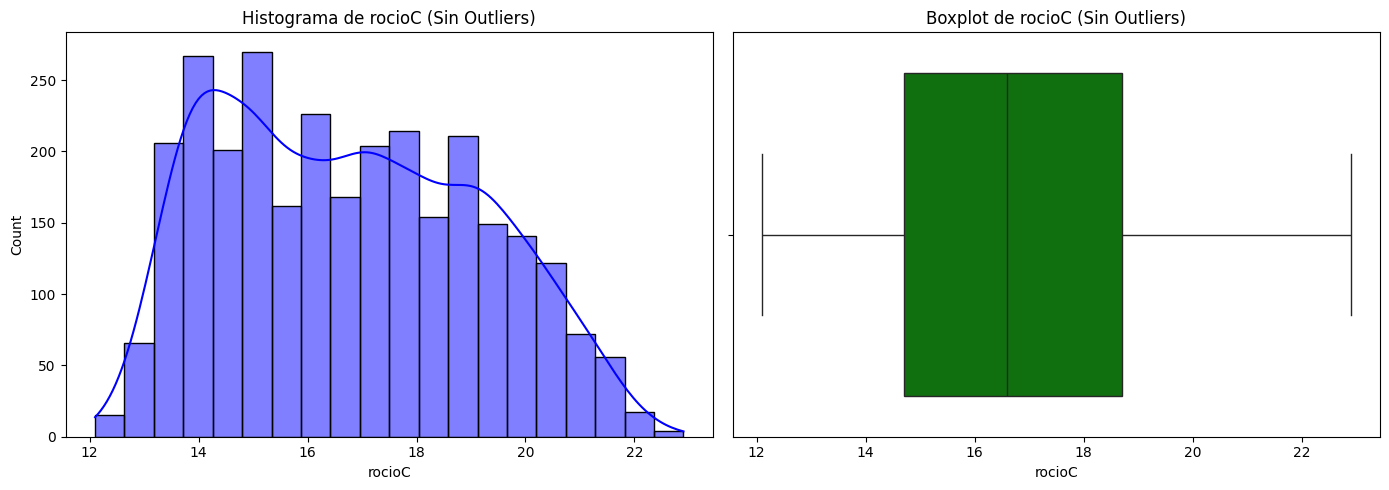

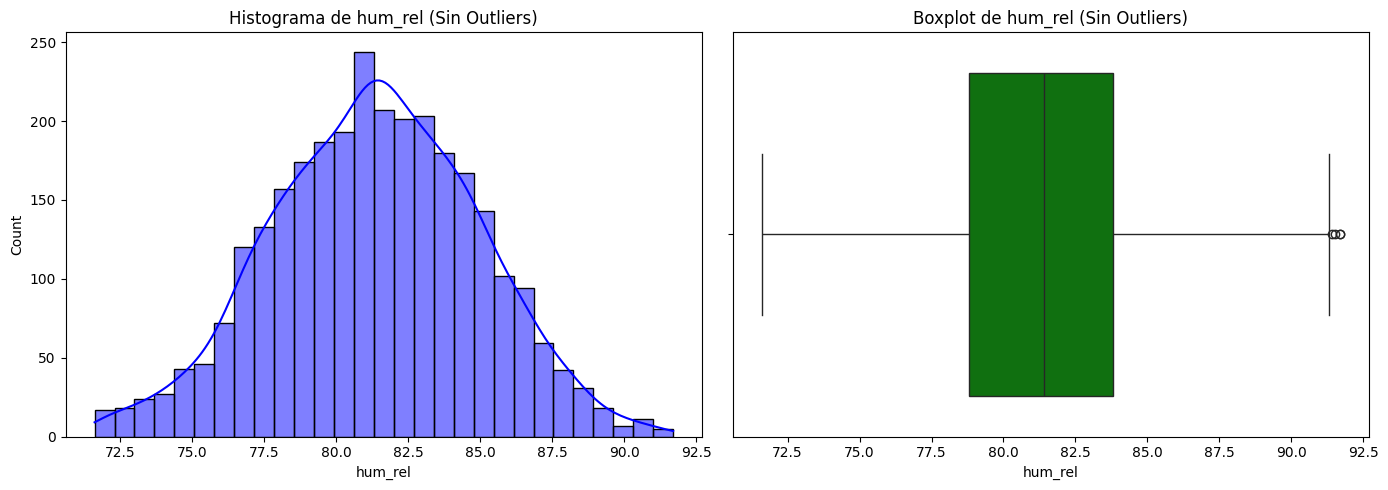

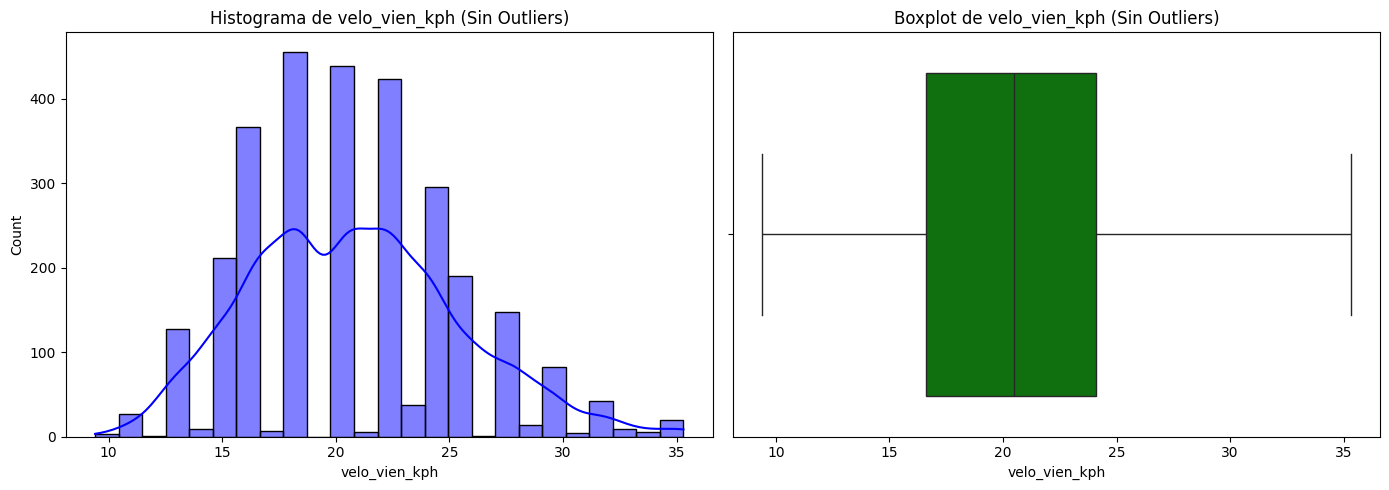

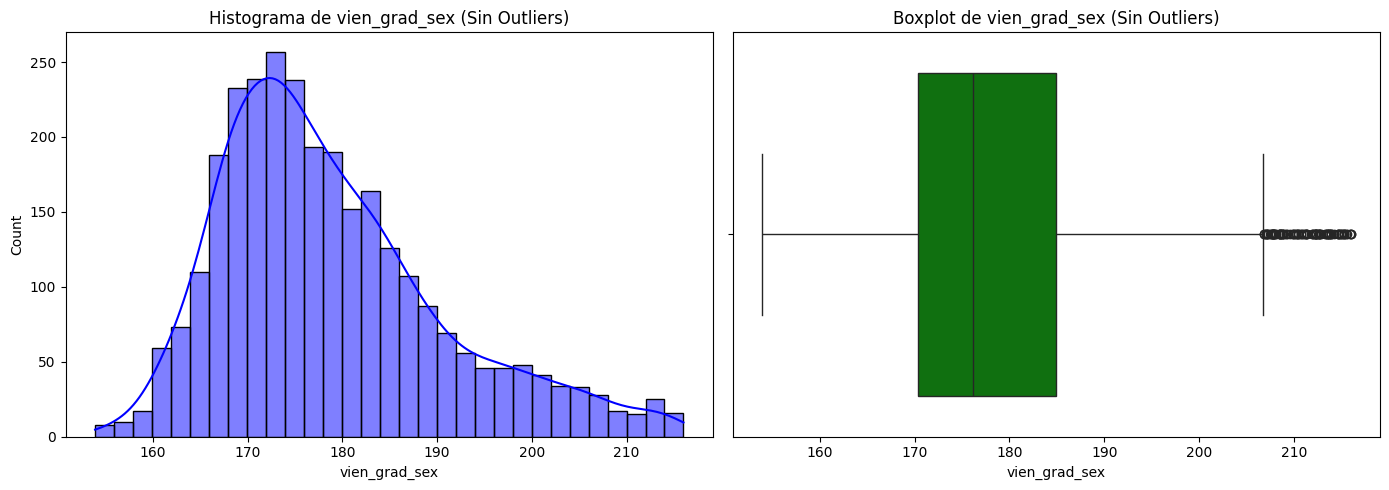

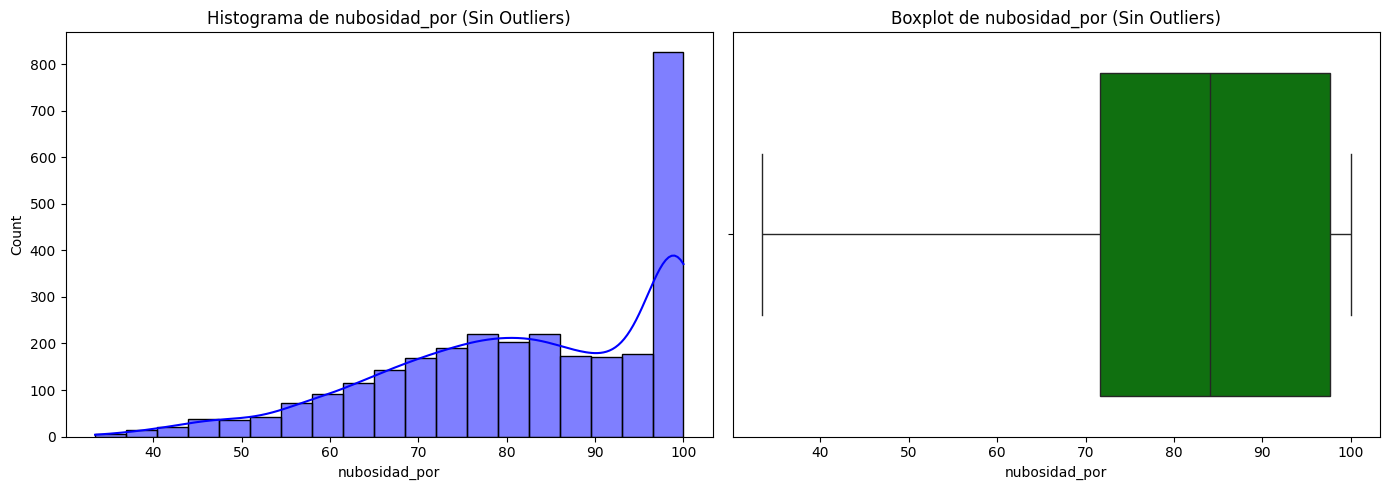

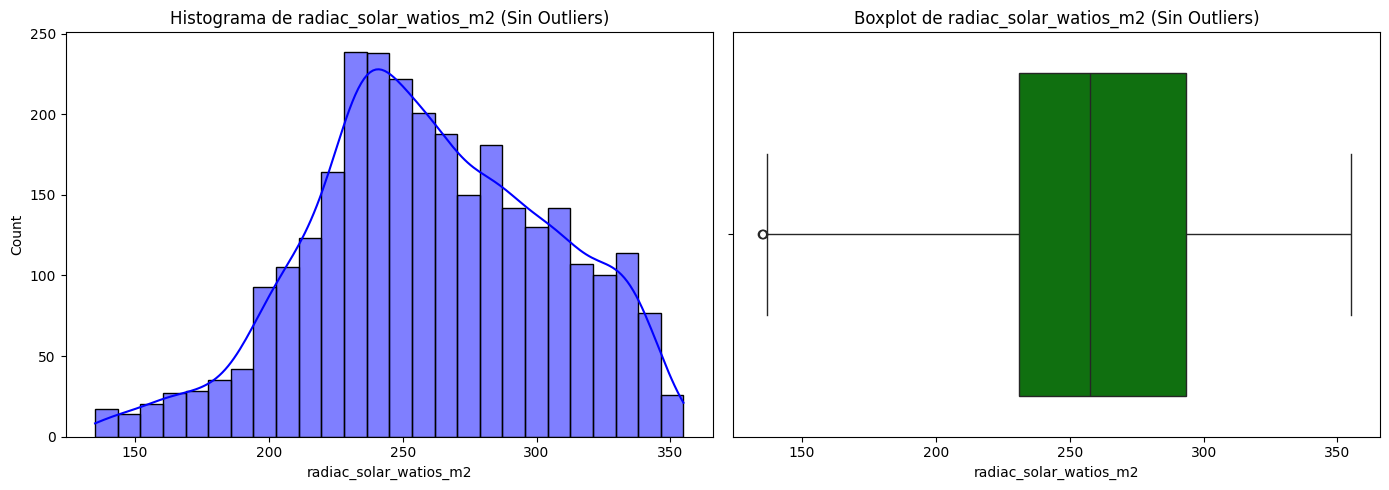

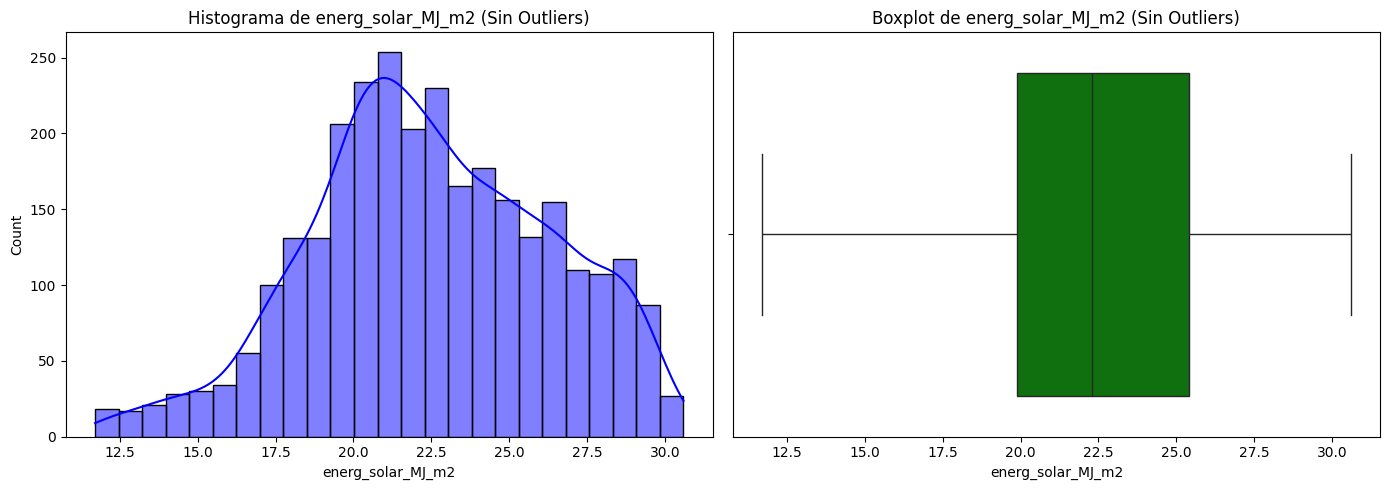

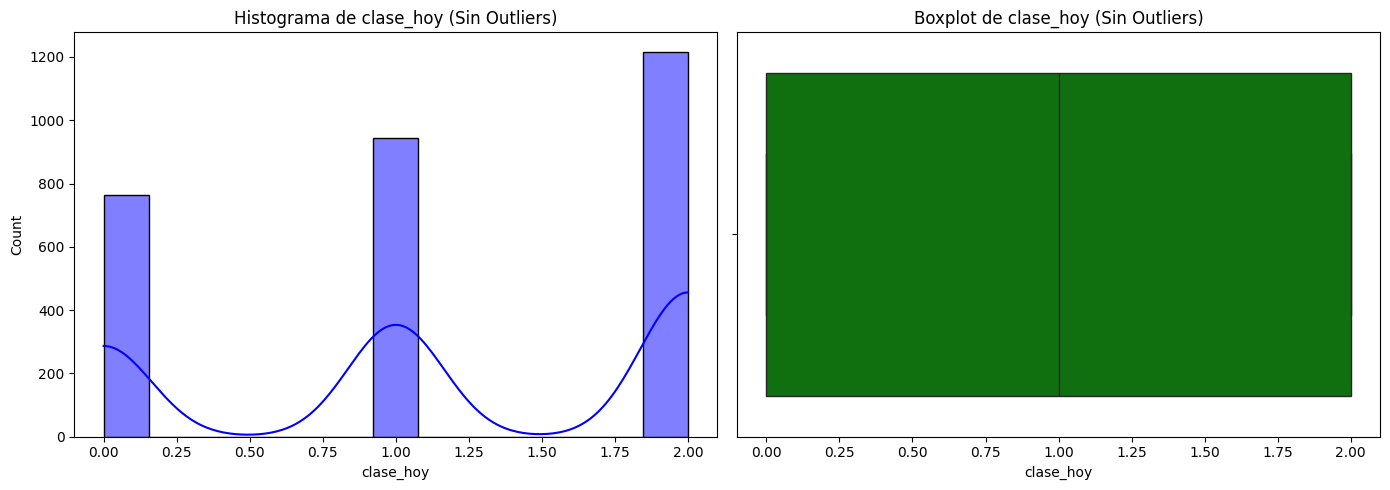

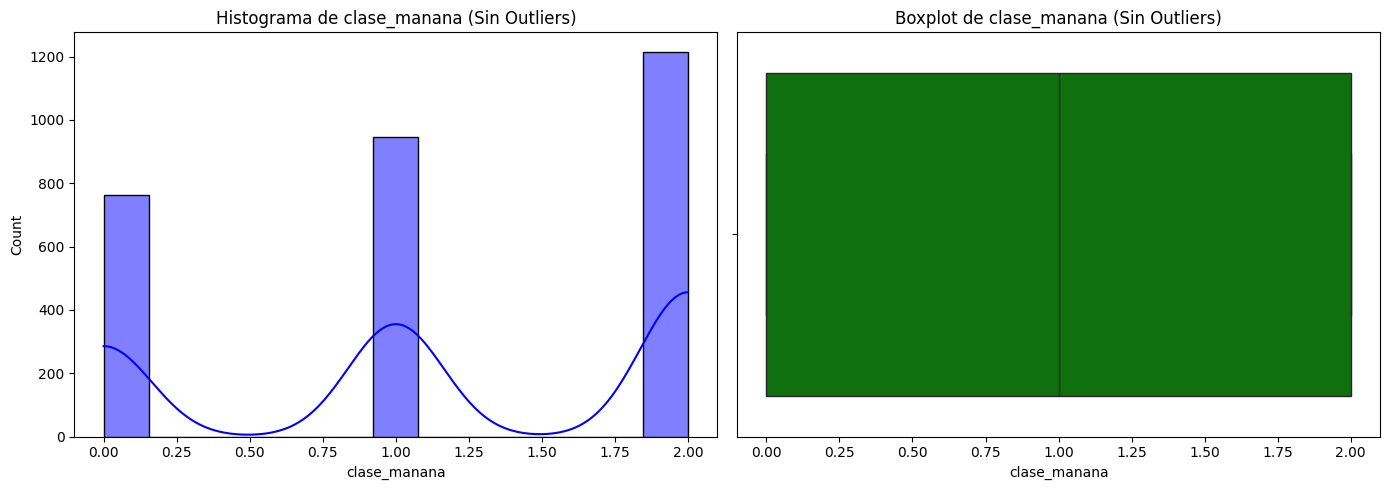

üóÇ Columnas en X (variables predictoras):
Index(['maxC', 'minC', 'rocioC', 'hum_rel', 'velo_vien_kph', 'vien_grad_sex',
       'nubosidad_por', 'radiac_solar_watios_m2', 'energ_solar_MJ_m2',
       'clase_hoy'],
      dtype='object')
Variable objetivo (y): clase_manana

‚úÇÔ∏è Tama√±o de X_train: (2340, 10)
Tama√±o de X_test: (585, 10) 

üîß Escalado completado con StandardScaler.

üìà Matriz de Correlaci√≥n (heatmap):



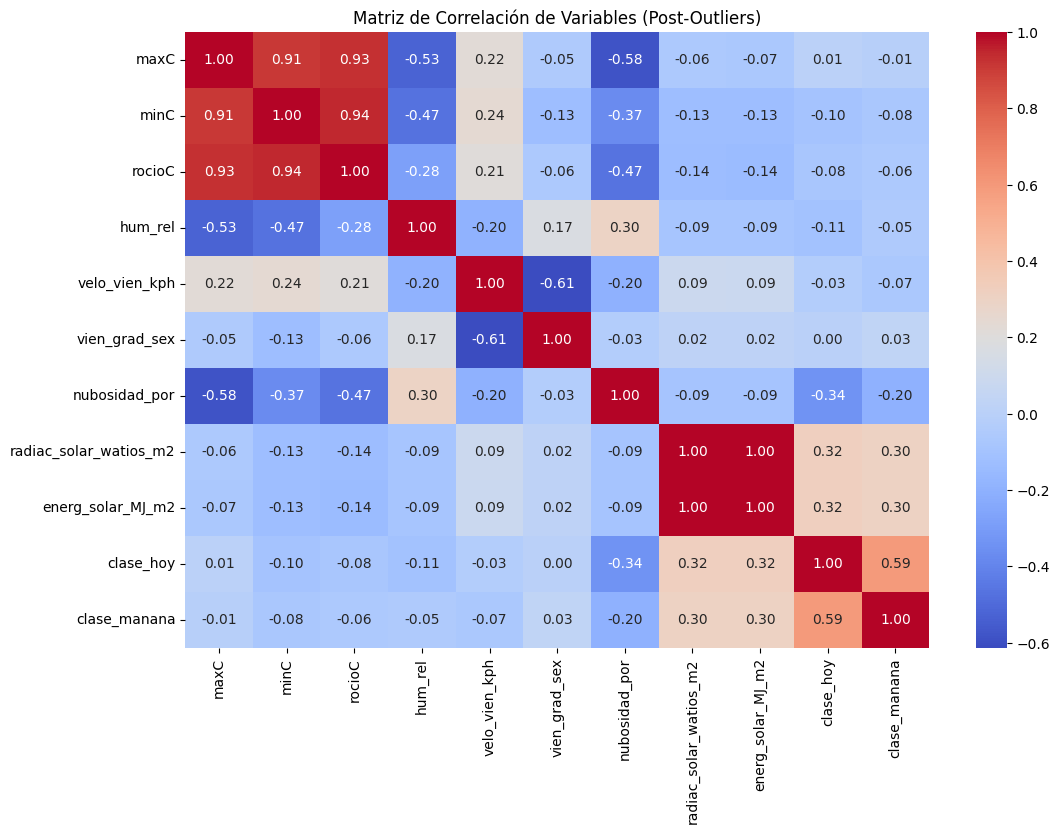


üå≥ Entrenando √Årbol de Decisi√≥n...

üîç [√Årbol de Decisi√≥n] Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       167
           1       0.57      0.59      0.58       172
           2       0.65      0.68      0.67       246

    accuracy                           0.64       585
   macro avg       0.64      0.63      0.63       585
weighted avg       0.64      0.64      0.64       585

Matriz de Confusi√≥n (Decision Tree):
[[105  23  39]
 [ 22 101  49]
 [ 27  52 167]]
Exactitud (Decision Tree): 0.6376

üå≤ Entrenando Random Forest...

üîç [Random Forest] Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       167
           1       0.64      0.72      0.68       172
           2       0.72      0.76      0.74       246

    accuracy                           0.71       585
   macro avg       0.72      0.71      0.71       5

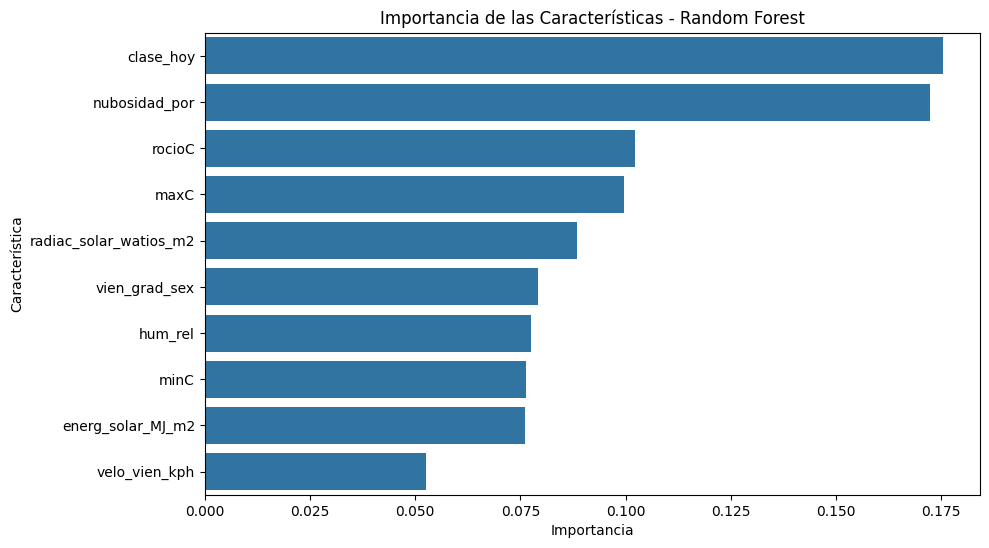


‚úÖ ¬°Proceso Finalizado! Se han entrenado √Årbol de Decisi√≥n, Random Forest y Gradient Boosting.


In [2]:
# =============================================================================
#            ***   PROBLEMA DE PREDICCION (SUPERVISADO)   ***
# =============================================================================
# Autor      :  Martin Verastegui
# Fecha      :  12-Dic-2024
# Descripci√≥n:
#   Este script realiza un an√°lisis exploratorio y entrena varios modelos de
#   Machine Learning (√Årbol de Decisi√≥n Y Random Forest) para predicci√≥n
# =============================================================================


# =============================================================================
# 1) Importar librer√≠as necesarias
# =============================================================================
# Estas librer√≠as nos permiten:
# - Manipular datos: pandas, numpy
# - Visualizar informaci√≥n: seaborn, matplotlib
# - Crear y evaluar modelos de ML: scikit-learn
# - Evitar problemas de subprocesos: os.environ

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento y evaluaci√≥n de ML
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Modelos de clasificaci√≥n
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# M√©tricas de evaluaci√≥n
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# =============================================================================
# 2) Configuraci√≥n inicial
# =============================================================================
# A veces, en sistemas con OpenMP o MKL, forzar un √∫nico hilo
# puede evitar bloqueos o saturaci√≥n de CPU.
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"


# =============================================================================
# 3) Carga del Dataset
# =============================================================================
file_path = "clima_aeropuerto_lima.csv"  # Ajusta la ruta/nombre seg√∫n tu entorno

try:
    # Se intenta leer con encoding 'latin-1' (frecuente en datos en espa√±ol)
    df = pd.read_csv(file_path, encoding='latin-1')
    print("\n===========================================================")
    print(" üìò Dataset cargado con √©xito.")
    print("===========================================================\n")
except FileNotFoundError:
    print("‚ùå Error: No se encontr√≥ el archivo. Verifica la ruta.")
    exit()
except UnicodeDecodeError:
    print("‚ö†Ô∏è Advertencia: Codificaci√≥n problem√°tica. Intentando con 'utf-8'.")
    df = pd.read_csv(file_path, encoding='utf-8')
except Exception as e:
    print(f"‚ùå Error inesperado: {e}")
    exit()


# =============================================================================
# 4) An√°lisis Exploratorio de Datos
# =============================================================================
# Mostrar algunas filas para tener una vista preliminar
print("\nüîç Primeras filas del DataFrame:")
print(df.head(), "\n")

# Informaci√≥n general del dataset (columnas, tipos de datos, nulos, etc.)
print("üìä Informaci√≥n del dataset:")
print(df.info(), "\n")

# Descripci√≥n estad√≠stica de las variables num√©ricas
print("üìà Estad√≠sticas descriptivas:")
print(df.describe(), "\n")

# Verificar valores nulos en cada columna
print("üîé Valores nulos por columna:")
print(df.isnull().sum(), "\n")


# =============================================================================
# 5) Eliminaci√≥n de columnas irrelevantes ('name', 'datetime')
# =============================================================================
col_drop = []
if 'name' in df.columns:
    col_drop.append('name')
if 'datetime' in df.columns:
    col_drop.append('datetime')

if col_drop:
    df.drop(col_drop, axis=1, inplace=True)
    print(f"üöÆ Columnas {col_drop} eliminadas por considerarse irrelevantes.\n")
else:
    print("No se eliminaron columnas 'name' o 'datetime'; no estaban presentes.\n")


# =============================================================================
# 6) Codificaci√≥n de variables categ√≥ricas (LabelEncoder)
# =============================================================================
# Las columnas de tipo 'object' se convierten a num√©ricas. 
# Ejemplo: "despejado" -> 0, "nublado" -> 1, etc.
label_encoders = {}
cat_cols = df.select_dtypes(include=['object']).columns

if len(cat_cols) > 0:
    print("üîÑ Codificando variables categ√≥ricas:\n")
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    print(f"‚úîÔ∏è Columnas categ√≥ricas codificadas: {list(cat_cols)}\n")
else:
    print("‚úîÔ∏è No se encontraron columnas categ√≥ricas para codificar.\n")


# =============================================================================
# 7) Visualizaci√≥n de la Distribuci√≥n de los Datos (Antes de remover outliers)
# =============================================================================
# Para cada columna num√©rica, generamos un histograma y un boxplot
# que nos ayude a observar la distribuci√≥n y la presencia de outliers.
num_cols_before = df.select_dtypes(include=[np.number]).columns

print("üîç Visualizando la distribuci√≥n de datos antes de remover outliers...\n")
for col in num_cols_before:
    plt.figure(figsize=(14, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Histograma de {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, color='green')
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


# =============================================================================
# 8) Detecci√≥n y eliminaci√≥n de outliers (IQR)
# =============================================================================
# Se define una funci√≥n para marcar como outliers los valores que
# est√©n fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

def find_outliers_IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

numeric_cols = df.select_dtypes(include=[np.number]).columns
initial_shape = df.shape

for col in numeric_cols:
    outlier_mask = find_outliers_IQR(df[col])
    # Eliminamos las filas que contengan outliers en esta columna
    df = df[~outlier_mask]

final_shape = df.shape
print("üîé Outliers eliminados:")
print(f" - Forma inicial: {initial_shape}")
print(f" - Forma final: {final_shape}\n")

# Revisar distribuci√≥n de datos despu√©s de eliminar outliers
print("üîç Visualizando la distribuci√≥n de datos luego de remover outliers...\n")
for col in numeric_cols:
    if col in df.columns:  # Asegurarnos de que la columna a√∫n exista
        plt.figure(figsize=(14, 5))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f"Histograma de {col} (Sin Outliers)")

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=col, color='green')
        plt.title(f"Boxplot de {col} (Sin Outliers)")

        plt.tight_layout()
        plt.show()


# =============================================================================
# 9) Definir Variable Objetivo (y) y Caracter√≠sticas (X)
# =============================================================================
# En este caso, como solicitamos predecir el "clima ma√±ana" (clase_manana),
# la variable objetivo es 'clase_manana'.
# Mantenemos 'clase_hoy' como parte de las caracter√≠sticas predictoras.

if 'clase_manana' not in df.columns:
    print("‚ùå Error: 'clase_manana' no existe en el dataset.")
    exit()

X = df.drop(['clase_manana'], axis=1)
y = df['clase_manana']

print("üóÇ Columnas en X (variables predictoras):")
print(X.columns)
print("Variable objetivo (y): clase_manana\n")


# =============================================================================
# 10) Separaci√≥n en Entrenamiento y Prueba (train_test_split)
# =============================================================================
# Dividimos un 80% para entrenamiento y 20% para prueba, con random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("‚úÇÔ∏è Tama√±o de X_train:", X_train.shape)
print("Tama√±o de X_test:", X_test.shape, "\n")


# =============================================================================
# 11) Escalado de Caracter√≠sticas (StandardScaler)
# =============================================================================
# Estandarizamos las variables num√©ricas para que todas tengan media 0 y std = 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta y transforma
X_test_scaled  = scaler.transform(X_test)       # Solo transforma con los mismos par√°metros

print("üîß Escalado completado con StandardScaler.\n")


# =============================================================================
# 12) Visualizaci√≥n de la Matriz de Correlaci√≥n 
# =============================================================================
print("üìà Matriz de Correlaci√≥n (heatmap):\n")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriz de Correlaci√≥n de Variables (Post-Outliers)")
plt.show()
print()


# =============================================================================
# 13) Entrenamiento y Evaluaci√≥n de Modelos
# =============================================================================

# A) √Årbol de Decisi√≥n
print("=============================================")
print("üå≥ Entrenando √Årbol de Decisi√≥n...")
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)

y_pred_dt = model_dt.predict(X_test_scaled)

print("\nüîç [√Årbol de Decisi√≥n] Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_dt))

print("Matriz de Confusi√≥n (Decision Tree):")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Exactitud (Decision Tree): {acc_dt:.4f}")
print("=============================================\n")


# B) Random Forest
print("=============================================")
print("üå≤ Entrenando Random Forest...")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

print("\nüîç [Random Forest] Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_rf))

print("Matriz de Confusi√≥n (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud (Random Forest): {acc_rf:.4f}")
print("=============================================\n")


# C) Gradient Boosting
print("=============================================")
print("üöÄ Entrenando GradientBoostingClassifier...")
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_scaled, y_train)

y_pred_gb = model_gb.predict(X_test_scaled)

print("\nüîç [Gradient Boosting] Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_gb))

print("Matriz de Confusi√≥n (Gradient Boosting):")
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Exactitud (Gradient Boosting): {acc_gb:.4f}")
print("=============================================\n")


# =============================================================================
# 14) Comparar Modelos y Validaci√≥n Cruzada
# =============================================================================
# Si queremos hacer validaci√≥n cruzada para ver la robustez de cada modelo:

print("üîÑ Validaci√≥n Cruzada (5 folds) para Random Forest:")
scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy')
print(f"Puntajes en cada fold: {scores_rf}")
print(f"Exactitud promedio: {scores_rf.mean():.4f} (+/- {scores_rf.std():.4f})\n")


print("üîÑ Validaci√≥n Cruzada (5 folds) para Gradient Boosting:")
scores_gb = cross_val_score(model_gb, X, y, cv=5, scoring='accuracy')
print(f"Puntajes en cada fold: {scores_gb}")
print(f"Exactitud promedio: {scores_gb.mean():.4f} (+/- {scores_gb.std():.4f})\n")


# (Podr√≠amos hacer la misma validaci√≥n cruzada para DecisionTree si lo deseamos.)


# =============================================================================
# 15) Importancia de Caracter√≠sticas (p.ej., Random Forest)
# =============================================================================
print("üåü Importancia de Caracter√≠sticas (Random Forest):\n")
importances_rf = model_rf.feature_importances_
feature_names = X.columns

imp_df_rf = pd.DataFrame({
    'Caracter√≠stica': feature_names,
    'Importancia': importances_rf
}).sort_values(by='Importancia', ascending=False)

print(imp_df_rf, "\n")

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Caracter√≠stica', data=imp_df_rf)
plt.title("Importancia de las Caracter√≠sticas - Random Forest")
plt.show()

print("\n‚úÖ ¬°Proceso Finalizado! Se han entrenado √Årbol de Decisi√≥n, Random Forest y Gradient Boosting.")
